In [2]:
import sqlite3
print("SQLite is working!")

SQLite is working!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Create & Connect to SQLite Database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

print("Database created and connected successfully!")

Database created and connected successfully!


In [5]:
#Create Sales Table
cursor.execute("CREATE TABLE IF NOT EXISTS sales (product TEXT, quantity INTEGER, price REAL)")
conn.commit()

print("Table created")

Table created


In [6]:
#Insert Values
cursor.execute("INSERT INTO sales VALUES ('Laptop', 2, 50000)")
cursor.execute("INSERT INTO sales VALUES ('Mouse', 5, 500)")
cursor.execute("INSERT INTO sales VALUES ('Keyboard', 3, 1500)")
cursor.execute("INSERT INTO sales VALUES ('Laptop', 1, 50000)")
cursor.execute("INSERT INTO sales VALUES ('Mouse', 2, 500)")

conn.commit()

print("Data inserted")

Data inserted


In [7]:
#Run SQL Query
query = "SELECT product, SUM(quantity), SUM(quantity * price) FROM sales GROUP BY product"
cursor.execute(query)
results = cursor.fetchall()

print(results)

[('Keyboard', 3, 4500.0), ('Laptop', 3, 150000.0), ('Mouse', 7, 3500.0)]


In [8]:
#Show Results as a Table
query = "SELECT product, SUM(quantity) as total_quantity, SUM(quantity * price) as total_revenue FROM sales GROUP BY product"
df = pd.read_sql_query(query, conn)

print(df)

    product  total_quantity  total_revenue
0  Keyboard               3         4500.0
1    Laptop               3       150000.0
2     Mouse               7         3500.0


<Figure size 200x200 with 0 Axes>

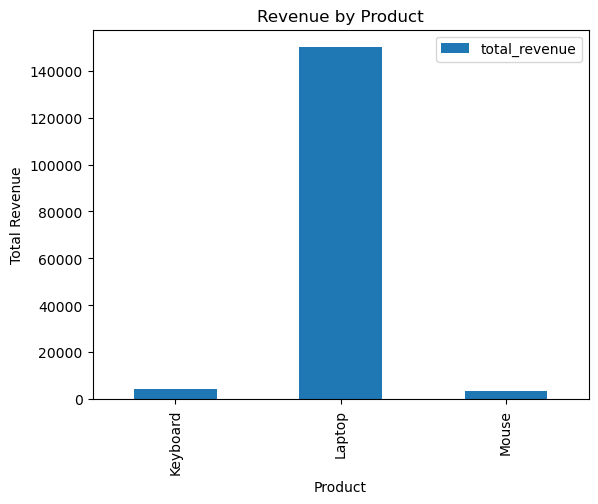

In [12]:
#Create Bar Chart
plt.figure(figsize=(2,2))
df.plot(kind='bar', x='product', y='total_revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")

plt.show()